#Importing the Libraries
BeautifulSoup are useful in the Removing the Html tags

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [ ]:
!unzip '/content/fake-news.zip'

Archive:  /content/fake-news.zip
  inflating: submit.csv              
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df1 = pd.read_csv('/content/train.csv')

In [ ]:
df1.shape

(20800, 5)

In [ ]:
df1.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.shape

(18285, 5)

In [ ]:
df2 = df1.head(5000)

In [ ]:
df2.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess(q):

    q = str(q).lower().strip()
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [ ]:
df2['title_preprocess'] = df2['title'].apply(preprocess)

<ipython-input-15-6f4177125e8f>:159: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)
<ipython-input-23-7ddff6935f82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['title_preprocess'] = df2['title'].apply(preprocess)


In [ ]:
df2.head(2)

,id,title,author,text,label,title_preprocess
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didn t even see comey s let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman on campus ...


In [ ]:
from wordcloud import WordCloud
def generate_wordcloud(text_data):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    #plt.axis('off')
    plt.show()

##WordCloud libraries will help us to check which word are frequently repeated,more frequency means large size of text

In [ ]:
text_data = ' '.join(df2['title_preprocess'])

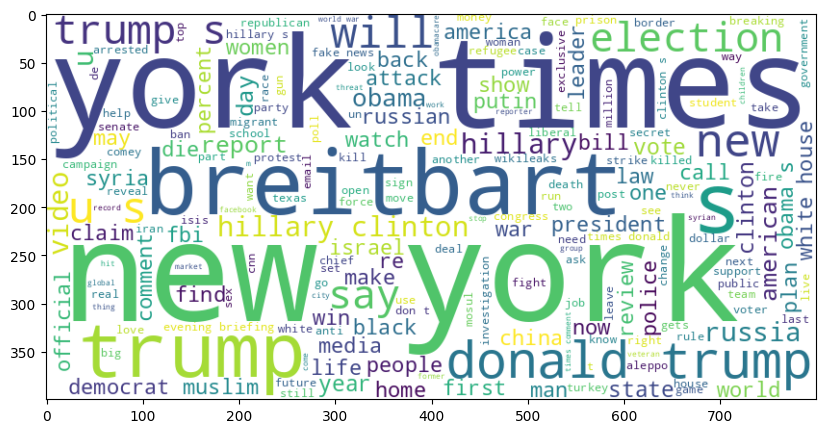

In [ ]:
generate_wordcloud(text_data)

In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem.porter import PorterStemmer
def stemmer_text(text):
  ps = PorterStemmer()
  words = word_tokenize(text)
  stem_word = [ps.stem(word) for word in words if word not in stopwords.words('english')]
  return ' '.join(stem_word)


In [ ]:
df2['title_preprocess_stem'] = df2['title_preprocess'].apply(stemmer_text)

<ipython-input-39-e516f293fc4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['title_preprocess_stem'] = df2['title_preprocess'].apply(stemmer_text)


In [ ]:
df2.head(3)

,id,title,author,text,label,title_preprocess,title_preprocess_stem
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide we didn t even see comey s let...,hous dem aid even see comey letter jason chaff...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,flynn hillary clinton big woman on campus ...,flynn hillari clinton big woman campu breitbart
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,why the truth might get you fired,truth might get fire


In [ ]:
df = df2[['label','title_preprocess_stem']]

In [ ]:
df.head(5)

,label,title_preprocess_stem
0,1,hous dem aid even see comey letter jason chaff...
1,0,flynn hillari clinton big woman campu breitbart
2,1,truth might get fire
3,1,15 civilian kill singl us airstrik identifi
4,1,iranian woman jail fiction unpublish stori wom...


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
df['title_preprocess_stem'][0]

'hous dem aid even see comey letter jason chaffetz tweet'

In [ ]:
corpus = []
for i in range(0,len(df['title_preprocess_stem'])):
  x = df['title_preprocess_stem'].iloc[i]
  corpus.append(x)

In [ ]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [ ]:
type(corpus)

list

In [ ]:
onehot_repr=[one_hot(words,voc_size)for words in corpus]
onehot_repr

In [ ]:
corpus[1]

'flynn hillari clinton big woman campu breitbart'

In [ ]:
onehot_repr[1]

[4146, 551, 3936, 2373, 2381, 2696, 4645]

##Embedding representation

In [ ]:
sent_len = 20
embedded_docs = pad_sequences(onehot_repr,padding = 'post',maxlen = sent_len)
print(embedded_docs)

[[3916 1096  236 ...    0    0    0]
 [4146  551 3936 ...    0    0    0]
 [3845 1375 2330 ...    0    0    0]
 ...
 [ 551 3936 2613 ...    0    0    0]
 [4841 1587 3149 ...    0    0    0]
 [4561 3043  657 ...    0    0    0]]


In [ ]:
embedded_docs[0]

array([3916, 1096,  236, 4561, 1079, 3355, 3337, 2185, 1643, 3817,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

##Creating model

In [ ]:
embedded_feature_vector = 40
model = Sequential()
model.add(Embedding(voc_size,embedded_feature_vector,input_length = sent_len))
model.add(LSTM(100))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 40)            200000    
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(df['label'])

In [ ]:
X_final.shape,y_final.shape

((5000, 20), (5000,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
63/63 [==============================] - 8s 58ms/step - loss: 0.5039 - accuracy: 0.7237 - val_loss: 0.2868 - val_accuracy: 0.8850
Epoch 2/10
63/63 [==============================] - 2s 37ms/step - loss: 0.1571 - accuracy: 0.9415 - val_loss: 0.2723 - val_accuracy: 0.9000
Epoch 3/10
63/63 [==============================] - 2s 35ms/step - loss: 0.0644 - accuracy: 0.9795 - val_loss: 0.4187 - val_accuracy: 0.8720
Epoch 4/10
63/63 [==============================] - 2s 38ms/step - loss: 0.0314 - accuracy: 0.9927 - val_loss: 0.4066 - val_accuracy: 0.8870
Epoch 5/10
63/63 [==============================] - 3s 55ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.4998 - val_accuracy: 0.8830
Epoch 6/10
63/63 [==============================] - 3s 41ms/step - loss: 0.0117 - accuracy: 0.9975 - val_loss: 0.5227 - val_accuracy: 0.8850
Epoch 7/10
63/63 [==============================] - 2s 38ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.7090 - val_accuracy: 0.8620
Epoch 8/10
63

##Adding Dropout layer

In [ ]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_2 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_2 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256501 (1001.96 KB)
Trainable params: 256501 (1001.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

In [ ]:
y_pred=model.predict(X_test)

32/32 [==============================] - 1s 9ms/step


In [ ]:
y_pred=np.where(y_pred > 0.6, 1,0) ##AUC ROC Curve

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_pred)

array([[531,  41],
       [ 68, 360]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.891

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       572
           1       0.90      0.84      0.87       428

    accuracy                           0.89      1000
   macro avg       0.89      0.88      0.89      1000
weighted avg       0.89      0.89      0.89      1000



macro avg = (Precision of class1 + precision of class2)/2

                       or

macro avg = (Recall of class1 + Recall of class2)/2

Weighted avg = (precision class0 * support of class0 + precision class1 * support of class1)/(support of class0 + support of class1)

weighted avg = (0.89 * 572 + 0.90 * 428)/(572+428)

In [ ]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow import keras
loaded_model = keras.models.load_model('my_model.h5')

In [ ]:
example_input = df1['title'][1]
input_sequences = tokenizer.texts_to_sequences(example_input)
padded_input = pad_sequences(input_sequences, maxlen=20)
padded_input
predictions = loaded_model.predict(padded_input)
if predictions[0][0] > 0.5:
    print("Fake news class")
else:
    print("Not Fake news class")

2/2 [==============================] - 0s 10ms/step
Fake news class


In [ ]:
example = X_test[1]
prediction = loaded_model.predict(np.array([example]))
threshold = 0.5  # Adjust the threshold as needed
predicted_class = 1 if prediction[0] > threshold else 0
if predicted_class > 0.5:
    print("Fake news class")
else:
    print("Not Fake news class")

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 40ms/step
Fake news class
Predicted Class: 1


In [ ]:
example = X_test[5]
prediction = loaded_model.predict(np.array([example]))
threshold = 0.5  # Adjust the threshold as needed
predicted_class = 1 if prediction[0] > threshold else 0
if predicted_class > 0.5:
    print("Fake news class")
else:
    print("Not Fake news class")

print("Predicted Class:", predicted_class)

1/1 [==============================] - 0s 23ms/step
Not Fake news class
Predicted Class: 0


In [ ]:
example_text = df1['title'][1]
preprocessed_text = preprocess(example_text)
stemmed_text = stemmer_text(preprocessed_text)
onehot_repr_example = [one_hot(stemmed_text, voc_size)]
sent_len = 20
padded_example = pad_sequences(onehot_repr_example, padding='post', maxlen=sent_len)
predicted_probabilities = loaded_model.predict(np.array(padded_example))
if predicted_probabilities > 0.5:
    print("Fake news class")
else:
    print("Not Fake news class")

1/1 [==============================] - 0s 28ms/step
Not Fake news class


In [ ]:
example_text = df1['title'][0]
preprocessed_text = preprocess(example_text)
stemmed_text = stemmer_text(preprocessed_text)
onehot_repr_example = [one_hot(stemmed_text, voc_size)]
sent_len = 20
padded_example = pad_sequences(onehot_repr_example, padding='post', maxlen=sent_len)
predicted_probabilities = loaded_model.predict(np.array(padded_example))
if predicted_probabilities > 0.5:
    print("Fake news class")
else:
    print("Not Fake news class")

1/1 [==============================] - 0s 57ms/step
Fake news class
